### Install Necessary Packages

In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install transformers
!pip install torch
!pip install librosa
!pip install sklearn
!pip install pydub

#ffmpeg is a dependency for pydub. Can install at the system level with:
# brew install ffmpeg

  Using cached numpy-1.26.1-cp311-cp311-macosx_11_0_arm64.whl.metadata (115 kB)
Using cached numpy-1.26.1-cp311-cp311-macosx_11_0_arm64.whl (14.0 MB)
  Using cached pandas-2.1.2-cp311-cp311-macosx_11_0_arm64.whl.metadata (18 kB)
  Using cached pytz-2023.3.post1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
Using cached pandas-2.1.2-cp311-cp311-macosx_11_0_arm64.whl (10.8 MB)
Using cached pytz-2023.3.post1-py2.py3-none-any.whl (502 kB)
  Using cached matplotlib-3.8.1-cp311-cp311-macosx_11_0_arm64.whl.metadata (5.8 kB)
  Using cached contourpy-1.2.0-cp311-cp311-macosx_11_0_arm64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.44.0-cp311-cp311-macosx_10_9_universal2.whl.metadata (153 kB)
  Using cached kiwisolver-1.4.5-cp311-cp311-macosx_11_0_arm64.whl.metadata (6.4 kB)
  Using cached Pillow-10.1.0-cp311-cp311-macosx_11_0_arm64.whl.metadata (9.5 kB)
  Using cached pyparsing-

### Directory Management to work with Audio Data files

In [ ]:
# combine the zip files into single zip file
!cat mp3.zip.* > single_mp3.zip

# unzip the mp3 files
!unzip mp3.zip

#move all mp3 files into mp3 folder
!find . -type f -name "*.mp3" -exec mv {} ./mp3/ \;

#remove all zip files
! rm -r 0 1 2 3 4 5 6 7 8 9 a b c d e f

### Converting Audio in MP3 to WAV

In [25]:
#Converting mp3 files to wav files

import os
from pydub import AudioSegment

# Directory where mp3 files are stored
mp3_dir = './mp3'

#Directory where wav files will be saved
wav_dir = './wav'

#Checking to see if wav directory exists
os.makedirs(wav_dir, exist_ok=True)

#counter to keep track of audio files
processed = 0

#Loop through all mp3 files in mp3 directory
for mp3 in os.listdir(mp3_dir):
    if processed >= 26000:
        break #stop processing files after the number above has been processed
    
    if mp3.endswith('.mp3'):
        mp3_path = os.path.join(mp3_dir, mp3)
        try:
            #Loading mp3 file
            audio = AudioSegment.from_mp3(mp3_path)
            
            #Create the output wav file path by changing the extension from mp3 to wav
            wav_file = mp3.replace('.mp3', '.wav')
            wav_path = os.path.join(wav_dir, wav_file)

            #Export audio as wav file
            audio.export(wav_path, format='wav')
            print(f'Converted: {mp3} -> {wav_file}')
            
            #Increment counter
            processed += 1
        except Exception as e:
            print(f'Error converting: {mp3}: {str(e)}')

Converted: heavy_mellow-horizons-04-worm_in_the_woodwork-262-291.mp3 -> heavy_mellow-horizons-04-worm_in_the_woodwork-262-291.wav
Converted: jacob_heringman-holburns_passion-18-fantasia_lute-0-29.mp3 -> jacob_heringman-holburns_passion-18-fantasia_lute-0-29.wav
Converted: rapoon-easterly_6_or_7-08-variable_2-349-378.mp3 -> rapoon-easterly_6_or_7-08-variable_2-349-378.wav
Converted: emmas_mini-beat_generation_mad_trick-04-highway_99-204-233.mp3 -> emmas_mini-beat_generation_mad_trick-04-highway_99-204-233.wav
Converted: dj_markitos-slower_emotions138_bpm_remixes-02-trance_odyssey_138_bpm_remix-407-436.mp3 -> dj_markitos-slower_emotions138_bpm_remixes-02-trance_odyssey_138_bpm_remix-407-436.wav
Converted: william_brooks-bitter_circus-10-my_love_looks_the_other_way-59-88.mp3 -> william_brooks-bitter_circus-10-my_love_looks_the_other_way-59-88.wav
Converted: magnatune_compilation-rock-04-tom_paul_its_an_easy_life-175-204.mp3 -> magnatune_compilation-rock-04-tom_paul_its_an_easy_life-175-20

### Checking the distribution of the label data

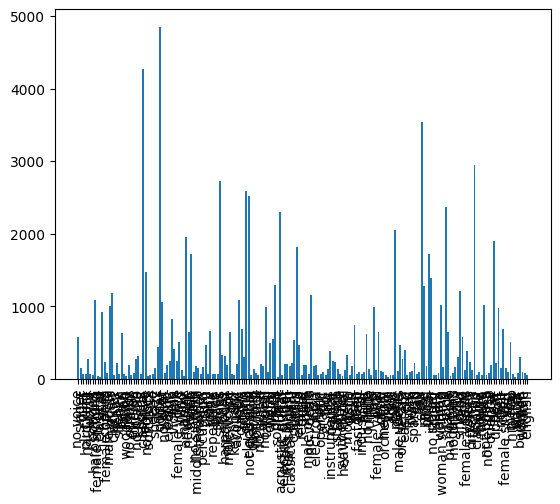

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

annotations = pd.read_csv('./annotations_final.csv', sep='\t')
clip_data = pd.read_csv('./clip_info_final.csv', sep= '\t')

#Check shape of data

# !find ./wav/ -type f | wc -l 
#print(annotations.shape)
# print(clip_data.shape)

#for each column, count the number of 1s and store in a dictionary

annotations_dict = {}
for column in annotations.columns:
    annotations_dict[column] = annotations[column].sum()
    
#remove first and last column    
del annotations_dict['clip_id'], annotations_dict['mp3_path']

#visualize distribution of variables in annotations
plt.bar(annotations_dict.keys(), annotations_dict.values())

#make the plot bigger
plt.rcParams['figure.figsize'] = [50, 10]

#rotate x axis labels
plt.xticks(rotation=90)
#make font size bigger
plt.rcParams.update({'font.size': 21})
#change font 
plt.rcParams['font.family'] = 'sans-serif'
plt.show()



### Make sure paths for annotations and text metadata match with audio directory. Also that the file types are correct.

In [4]:
def clean_path(file):
    '''
    To clean the path of the file to merge the datasets
    '''
    file['mp3_path'] = file['mp3_path'] = 'mp3/' + file['mp3_path'].str.split('/').str[1] #replace the path with the correct path
    file['mp3_path'] = file['mp3_path'].str.replace('.mp3', '.wav') #change the file type to .wav

    #print the first few rows to check
    print(file['mp3_path'].head(3))
    
    return file

clip_data_clean = clean_path(clip_data)
annotations_clean = clean_path(annotations)

#output the new clip_data_clean into csv to inspect

clip_data_clean.to_csv('clip_data_clean.csv', index=False)
annotations_clean.to_csv('annotations_clean.csv', index=False)

0    mp3/american_bach_soloists-j_s__bach_solo_cant...
1    mp3/american_bach_soloists-j_s__bach_solo_cant...
2    mp3/american_bach_soloists-j_s__bach_solo_cant...
Name: mp3_path, dtype: object
0    mp3/american_bach_soloists-j_s__bach_solo_cant...
1    mp3/american_bach_soloists-j_s__bach_solo_cant...
2    mp3/american_bach_soloists-j_s__bach_solo_cant...
Name: mp3_path, dtype: object


### Data Loading - Create a dataloader to combine / process audio, metadata, and label